In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dev = pd.read_csv('development.csv')
print(f"Number of reviews in dev: {len(dev)}")

Number of reviews in dev: 28754


In [47]:
#NO (do not run these!). Trying to balanced classes
from numpy.random import rand
counter = 0
for i,r in dev.iterrows():
    n = rand()
    if r[1] == 'pos' and counter<10000 and n < 0.5:
        dev = dev.drop(i,axis=0)
        counter = counter + 1
print(len(dev))

18968


In [3]:
eva = pd.read_csv('evaluation.csv')
print(f"Number of reviews in dev: {len(eva)}")

Number of reviews in dev: 12323


In [12]:
#NO. Trying to balanced classes
posWords = pd.read_csv('ListPositiveWord.csv',skiprows=1)
negWords = pd.read_csv('ListNegativeWord.csv',skiprows=1)

In [ ]:
import re
from nltk.corpus import stopwords as sw
import spacy

stop_words = sw.words('italian')

frequent = ['hotel','albergo','camera','zoomarine','zona','prima','volta','principale']+\
['colazione','pranzo','cena','brioche','ristorante','cibo'+'yogurt','frutta','cereali','zucchero','caffe','acqua']+\
['venezia',',milano','roma','ischia','vacanza','viaggio','visita','vista','camera','stato','scogliera','paese','citta','italia','collina','montagna','strada','giardino','piscina','spiaggia','mare','giugno','luglio','agosto','settembre','terrazza']+\
['stata','volere','tangere','cibare','volto','avvisare','penare','entare','sottostare','tangere','notte','aspettare','vedere','vivere','volare','visualizzare','docciare','bagnare','soggiornare','affacciare','mangiare','macchinare','parlare','avere','tornire','ristorare','portare','versare','seguire','terrazzare','raggiungere','cimare','cercare','visitare','trovare','gestire','fissare']+\
['windows','week','weekend','western','suite','wellness','wagner','westin','york','wonderbox','reception','autobus']+\
['roberta','mario','luigi','quali','scogliera']
unfrequent = ['abbandonato','abbandono','abbassare','abbastanza','abbazia', 'abbigliamento', 'abbondante', 'abbraccio', 'abito', 'abituale', 'abituati', 'abituato', 'abitudine', 'abruzzo', 'accademia', 'accadere', 'accaduto', 'accanto','accappatoio', 'accattivante', 'accedere', 'accende', 'accendere', 'accessibile', 'accessori','accessoriate', 'accettabile', 'accettano', 'accettare', 'accoglie', 'accogliente', 'accoglienti','accoglienza','accogliere','accolgono','accolta','accolti','accolto','accomodante','accomodare','accompagnamento','accontentare','accontentato','accordo','accorgo','accortezza','accorto','accostato','accuratamente','accurate','accurato','acqua']

include_words = ['no','non','mai','bene','bel','buon','caro']
for i in include_words:
    if i in stop_words:
        stop_words.remove(i)


stop_words=stop_words+frequent+unfrequent
stop_words = set(stop_words)
include_words = set(include_words)

lemmatizer = spacy.load("it_core_news_sm", disable=["tokenizer","tagger", "parser", "ner", "textcat"])
def CleanSentence(sentence,sw=stop_words):
    sentence = sentence.lower()
    sentence = re.sub("`!@#$%^&*()_+-\{}|;'':,./<>?", "", sentence)
    sentence = re.sub("(\\d|\\W)+", " ", sentence)
    
    lemmas = lemmatizer(sentence)
    newSentence = ""
    removed_s = []
    removed_c = []
    min = 4
    max = 18
    for lemma in lemmas:
        word = lemma.lemma_
        if word not in stop_words:
            if  (min < len(word) < max or word in include_words):
                newSentence = newSentence + word + " "
            else:
                removed_c.append(word)
        else:
            removed_s.append(word)
    if(False):
        print(removed_s)
        if(len(removed_c)>0):
            print()
            print(removed_c)
            print("--- ---- ----")
    return newSentence

def CleanText(text):
    sentences = []
    for row in text:
        sentences.append(CleanSentence(row))
    
    return sentences

In [10]:
dev['clean'] = CleanText(dev['text'])

In [26]:
#NO. Try to balance the classes: Normal: 2/3 pos, 1/3 neg
for i,r in dev.iterrows():
    if r[1] == 'neg':
        dev = dev.append(r)

37976

In [ ]:
#NO
posWords['clean'] = CleanSentence(posWords.iloc[0,0])
negWords['clean'] = CleanSentence(negWords.iloc[0,0])
dev = dev.append(posWords)
dev = dev.append(negWords)
dev = dev.reset_index(drop=True)

In [11]:
eva['clean'] = CleanText(eva['text'])

In [13]:
#NO
counter_text = []
words_text = {}
for s in dev['text']:
    counter_text.append(len(s.split()))
    for w in s.split():
        if w not in words_text:
            words_text[w] = 1
        words_text[w] = words_text[w] + 1
print(f'Different words in dev: {len(words_text)}')

Different words in dev: 153276


In [14]:
#NO
counter_clean = []
words_clean = {}
for index, row in dev.iterrows():
    counter_clean.append(len(row[2].split()))
    for w in row[2].split():
        if w not in words_clean:
            words_clean[w] = 1
        words_clean[w] = words_clean[w] + 1
print(f'Different words in dev (cleaned): {len(words_clean)}')

Different words in dev (cleaned): 32302


In [17]:
#NO
counter_text_eva = []
words_text_eva = {}
for s in eva['text']:
    counter_text_eva.append(len(s.split()))
    for w in s.split():
        if w not in words_text_eva:
            words_text_eva[w] = 1
        words_text_eva[w] = words_text_eva[w] + 1
print(f'Different words in eva: {len(words_text_eva)}')

Different words in eva: 89558


In [18]:
#NO
counter_clean_eva = []
words_clean_eva = {}
for index, row in eva.iterrows():
    counter_clean_eva.append(len(row[1].split()))
    for w in row[1].split():
        if w not in words_clean_eva:
            words_clean_eva[w] = 1
        words_clean_eva[w] = words_clean_eva[w] + 1
print(f'Different words in eva (cleaned): {len(words_clean_eva)}')

Different words in eva (cleaned): 21522


In [19]:
print(f'Different words in dev: {len(words_text)} in eva: {len(words_clean)}')

Different words in dev:153276 in eva:32302


In [20]:
print(f'Different words in (cleaned) dev: {len(words_text_eva)} in eva: {len(words_clean_eva)}')

Different words in (cleaned) dev:89558 in eva:21522


means: 113.55035821103151 113.11855879250183
stds: 100.67431714434085 100.60579541968868


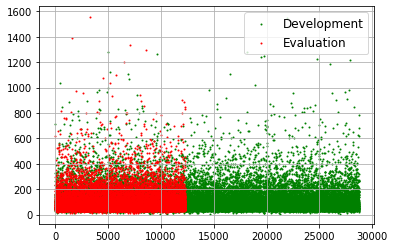

In [21]:
#NO
fig, ax = plt.subplots()
ax.scatter(range(0,len(counter_text)),counter_text,s=1,c='green',label='Development')
ax.scatter(range(0,len(counter_text_eva)),counter_text_eva,s=1,c='red',label='Evaluation')
print(f'means: {np.mean(counter_text)} {np.mean(counter_text_eva)}')
print(f'stds: {np.std(counter_text)} {np.std(counter_text_eva)}')

ax.legend(loc="upper right",fontsize=12)
ax.grid(True)

plt.show()

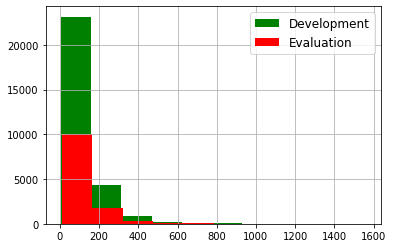

In [16]:
#NO
fig, ax = plt.subplots()
plt.hist(counter_text,label='Development',color='green')
plt.hist(counter_text_eva,label='Evaluation',color='red')

ax.legend(loc="upper right",fontsize=12)
ax.grid(True)

plt.show()

means: 55.00441677679627 54.8066217641808
stds: 47.37242487300371 47.27261542122252


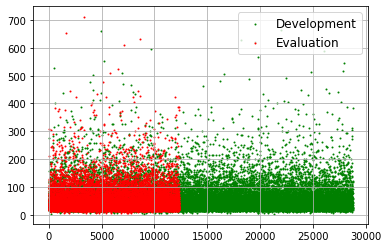

In [17]:
#NO
fig, ax = plt.subplots()
ax.scatter(range(0,len(counter_clean)),counter_clean,s=1,c='green',label='Development')
ax.scatter(range(0,len(counter_clean_eva)),counter_clean_eva,s=1,c='red',label='Evaluation')
print(f'means: {np.mean(counter_clean)} {np.mean(counter_clean_eva)}')
print(f'stds: {np.std(counter_clean)} {np.std(counter_clean_eva)}')

ax.legend(loc="upper right",fontsize=12)
ax.grid(True)

plt.show()

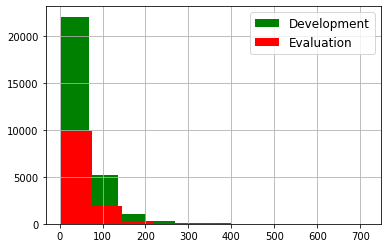

In [18]:
#NO
fig, ax = plt.subplots()
plt.hist(counter_clean,label='Development',color='green')
plt.hist(counter_clean_eva,label='Evaluation',color='red')

ax.legend(loc="upper right",fontsize=12)
ax.grid(True)

plt.show()

In [26]:
#NO
p = {'pos':0,'neg':0}
for i,r in dev.iterrows():
    if r[1] == 'pos':
        p['pos']  = p['pos'] + 1
    else:
        p['neg']  = p['neg'] + 1
print(f"Positive {p['pos']} Negative {p['neg']}")

Positive 19532 Negative 9222


<BarContainer object of 2 artists>

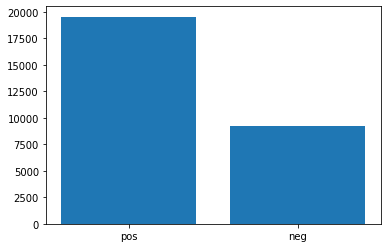

In [27]:
plt.bar(p.keys(), p.values())

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.util import ngrams

max_feature = len(dev['clean'])
print(f'#Feature {max_feature}')

def X_tfidf(sentences,max_feature = max_feature):  
    tfidf = TfidfVectorizer(min_df=20, max_df=0.80, ngram_range=(1,2),lowercase=False)
    X = tfidf.fit_transform(sentences)
    return X, tfidf
#Feature 28754

#Feature 28754


In [8]:
from sklearn.model_selection import train_test_split
if(False):
    dev = pd.read_csv('development.csv')
    dev['clean'] = CleanText(dev['text'])
    eva = pd.read_csv('evaluation.csv')
    eva['clean'] = CleanText(eva['text'])
X, vectorizer = X_tfidf(dev.iloc[:,2])

X_train, X_test, y_train, y_test = train_test_split(X,dev.iloc[:,1],test_size=0.1,random_state=0)

In [12]:
Y = vectorizer.transform(eva.iloc[:,1])

In [ ]:
#NO. KFold
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold 

kf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=0) 
#kf = KFold(n_splits=10, random_state=0) 
labels = dev.iloc[:,1]

classifier1 = SGDClassifier()
classifier2 = LinearSVC(tol=1e-8,max_iter=10000,random_state=0,C=80/100, penalty='l2')
classi = classifier2

X_ins = X
y_ins = dev.iloc[:,1]
score = []
for train_index, test_index in kf.split(X_ins):
    X_tr, X_te = X_ins[train_index], X_ins[test_index] 
    y_tr, y_te = y_ins[train_index], y_ins[test_index]
    classi.fit(X_tr,y_tr)
    y_p = classi.predict(X_te)
    score.append(f1_score(y_te, y_p, average='weighted'))
#train_model(sgd, X_train, X_test, y_train, y_test)
np.mean(score)

In [ ]:
#NO
y_pr = sgd1.predict(X_test)
print(f"#f1 Score: {f1_score(y_test, y_pr, average='weighted')}")
y_eval = sgd1.predict(Y)

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
def train_model(classifier, X_train, X_test, y_train, y_test, printAll=False, printSomething=True):
    
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    
    if(printSomething):
        print(f"#Accurancy: {accuracy_score(y_test, y_pred):.5f}")
        print(f"#f1 Score: {f1_score(y_test, y_pred, average='weighted'):.5f}")
        
    if(printAll):
        print(confusion_matrix(y_test,y_pred))      
        print(classification_report(y_test,y_pred))
    print("#--- --- ---")    

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

for i in range(10,110,10):
    print(i/100)
    mNB = MultinomialNB(alpha=i/100)
    print(f'Classifier MultinomialNB')
    train_model(mNB, X_train.todense(), X_test.todense(), y_train, y_test)
    bNB = BernoulliNB(alpha=i/100)
    print(f'Classifier BernoulliNB')
    train_model(bNB, X_train.todense(), X_test.todense(), y_train, y_test)
    print("--- ---- ----")
gNB = GaussianNB()
print(f'Classifier GaussianNB')
train_model(gNB, X_train.todense(), X_test.todense(), y_train, y_test)
#Accurancy: 0.95410
#f1 Score: 0.95371
#--- --- ---

In [8]:
#Require too much memory
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()# Fit on training set only.
scaler.fit(X_train.todense())# Apply transform to both the training set and the test set.
X_train_scal = scaler.transform(X_train.todense())
X_test_scal = scaler.transform(X_test.todense())

pca = PCA(0.95)
#pca.fit(X_train_scal)
X_train_pca = pca.transform(X_train_scal)
X_test_pca = pca.transform(X_test_scal)

lsvc = LinearSVC(tol=1e-8,max_iter=10000,random_state=0,C=50/100, penalty='l2')
train_model(lsvc, X_train_pca, X_test_pca, y_train, y_test)

In [20]:
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import LinearSVC

tsvd = TruncatedSVD(n_components=3000, n_iter=2, random_state=0)
tsvd.fit(X_train)
X_train_svd = tsvd.transform(X_train) 
X_test_svd = tsvd.transform(X_test) 

In [22]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(tol=1e-8,max_iter=10000,random_state=0,C=50/100, penalty='l2')
train_model(lsvc, X_train_svd, X_test_svd, y_train, y_test)

#Accurancy: 0.96523
#f1 Score: 0.96511
#--- --- ---


In [ ]:
#CHOOSE 1
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

for i in range(10,210,10):
    print(i/100)
    lsvc = LinearSVC(loss='hinge',tol=1e-8,max_iter=100000,random_state=0,C=i/100, penalty='l2')
    train_model(lsvc, X_train, X_test, y_train, y_test)

svc = SVC(random_state=0,kernel='linear')
#train_model(svc, X_train, X_test, y_train, y_test)

In [ ]:
lsvc = LinearSVC(loss='hinge',tol=1e-8,max_iter=100000,random_state=0,C=0.7, penalty='l2')
train_model(lsvc, X_train, X_test, y_train, y_test)
y_eval = lsvc.predict(Y)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2',max_iter=10000,random_state=0)
train_model(lr, X_train, X_test, y_train, y_test)
#Accurancy: 0.9548
#f1 Score: 0.9543
#--- --- ---

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=250, random_state=0)
train_model(classifier, X_train, X_test, y_train, y_test)
#Accurancy: 0.9286
#f1 Score: 0.9272
#--- --- ---

In [ ]:
y_eval = classifier.predict(Y)

In [33]:
#CHOOSE 2
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='hinge', penalty='l2', validation_fraction=0.1,max_iter=100000,tol=0.00001)
train_model(sgd, X_train, X_test, y_train, y_test,printAll=True)
#Accurancy: 0.96627
#f1 Score: 0.96618
#--- --- ---

#Accurancy: 0.96697
#f1 Score: 0.96683
[[ 901   63]
 [  32 1880]]
              precision    recall  f1-score   support

         neg       0.97      0.93      0.95       964
         pos       0.97      0.98      0.98      1912

    accuracy                           0.97      2876
   macro avg       0.97      0.96      0.96      2876
weighted avg       0.97      0.97      0.97      2876

#--- --- ---


In [87]:
y_eval = sgd.predict(Y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

score = []
for i in range(2,100,2):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    sco = f1_score(y_test, y_pred, average='weighted')
    score.append(sco)
    print(f'{i} {sco:.4f}')

In [14]:
def WriteOnFile(name):
    f = open(name,"w")
    f.write("Id,Predicted\n")
    for index,i in enumerate(y_eval):
        f.write(f"{index},{i}\n")
    f.close

In [15]:
WriteOnFile("out.csv")

In [28]:
frequent_word = []
for i in sorted(vectorizer.vocabulary_.items(), key = lambda kv:(kv[1])):
    frequent_word.append(i)

In [ ]:
frequent_word[-50:-1] 

In [ ]:
frequent_word[0:150]

In [126]:
from wordcloud import WordCloud
def Word_Cloud(words):
    text = ""
    for i in words[1:-1]:
        if len(i[0].split(' ')) ==1:
             text = text + " " + i[0]
    plt.figure( figsize=(20,10), facecolor='k', frameon=False)
    wordcloud= WordCloud(width=1200, height=600,min_font_size=8, max_font_size=100, max_words=500, background_color="white", contour_width=0,contour_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

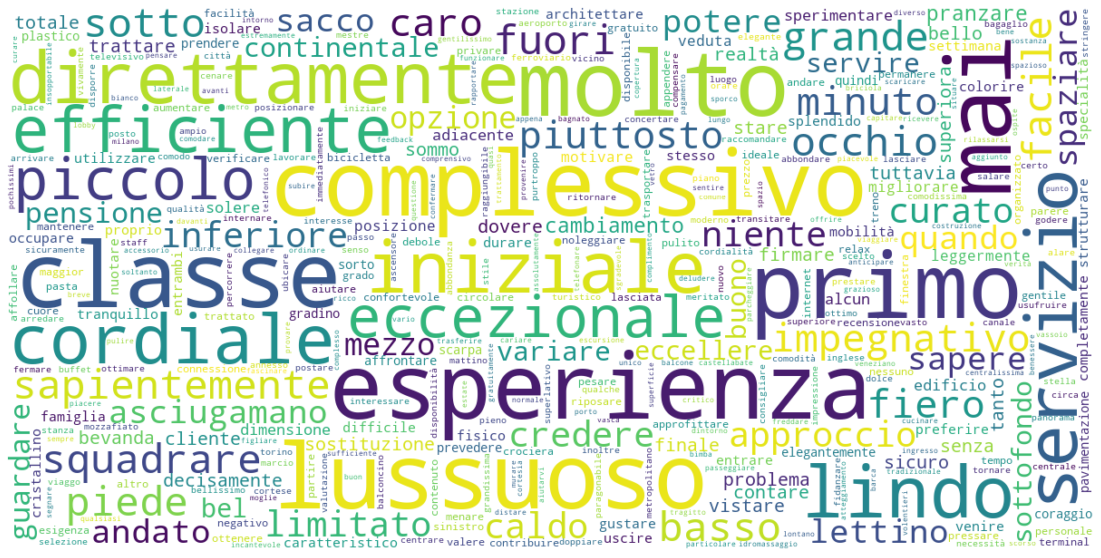

In [127]:
Word_Cloud(list(vectorizer.vocabulary_.items()))